In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Group_20_data_cleaned.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1 , inplace = True)

In [4]:
df.head()

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
1,I,5,12,3,7,2,10.0,5,5,4,13.0,3,9.0,2.0,8.0,4.0,10.0
2,D,4,11,6,8,6,10.0,6,2,6,10.0,3,7.0,3.0,7.0,3.0,9.0
3,N,7,11,6,6,3,5.0,9,4,6,4.0,4,10.0,6.0,10.0,2.0,8.0
4,G,2,1,3,1,1,8.0,6,6,6,6.0,5,9.0,1.0,7.0,5.0,10.0


In [5]:
x = df.drop('Letter', axis = 1)

In [6]:
y = df.Letter

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train , X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [9]:
X_train.shape

(16000, 16)

In [10]:
X_test.shape

(4000, 16)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [ ]:
### RANDOM FOREST CLASSIFIER

In [59]:
n = np.arange(1,100,2)
train_acc = np.empty(len(n))
test_acc = np.empty(len(n))

In [13]:
model1 = RandomForestClassifier()
for i,k in enumerate(n):
    mod = RandomForestClassifier(n_estimators=k)
    mod.fit(X_train,Y_train)
    train_acc[i]=mod.score(X_train,Y_train)
    test_acc[i]=mod.score(X_test,Y_test)
    

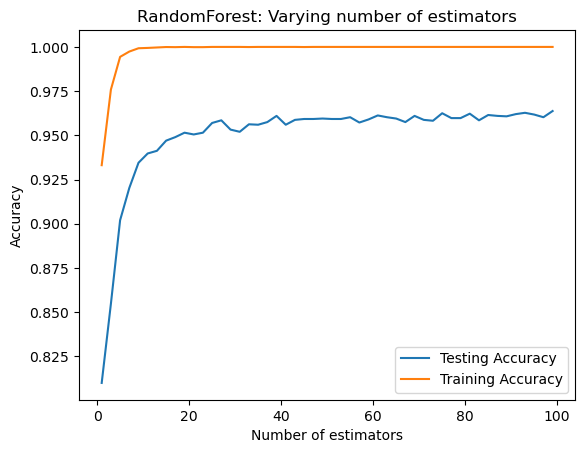

In [14]:
plt.title('RandomForest: Varying number of estimators')
plt.plot(n,test_acc, label = 'Testing Accuracy')
plt.plot(n,train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
### RANDOM FORESR CLASSIFIER MODEL SELECTION 
### BEST PARAMETERS AFTER HYPER PARAMETER TUNING

In [25]:
modelf1 = RandomForestClassifier(bootstrap = False,
                                max_features= 'sqrt',
                                min_samples_leaf=1,
                                min_samples_split= 2,
                                n_estimators=40) 

In [26]:
modelf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=40)

In [27]:
modelf1.score(X_test,Y_test)

0.96125

In [49]:
y_pred1 = modelf1.predict(X_test)

In [50]:
cm1 = confusion_matrix(Y_test,y_pred1)
print(cm1)

[[162   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 144   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   1
    1   0   0   3   0   1   0   0]
 [  0   0 140   0   3   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 150   0   0   0   0   0   0   0   0   0   1   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   0   1   0 134   0   1   0   0   0   1   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   0   1 136   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   0   1   0   1   0]
 [  0   0   0   2   0   1 149   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0 138   0   0   4   0   0   0   0   1   1   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 132   3   0   0   0   0   0   0   0   0
    1   0   0   0   0   1   0   1]
 [  0   0   0   0  

In [51]:
clf1 = classification_report(Y_test, y_pred1)
print(clf1)

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       162
           B       0.93      0.95      0.94       152
           C       0.98      0.97      0.98       144
           D       0.91      0.96      0.94       156
           E       0.94      0.96      0.95       139
           F       0.94      0.94      0.94       144
           G       0.97      0.97      0.97       154
           H       0.95      0.95      0.95       146
           I       0.96      0.96      0.96       138
           J       0.97      0.96      0.97       141
           K       0.91      0.94      0.92       137
           L       0.98      0.98      0.98       139
           M       0.99      0.97      0.98       145
           N       0.98      0.92      0.95       161
           O       0.94      0.93      0.94       173
           P       0.98      0.95      0.96       174
           Q       0.95      0.99      0.97       159
           R       0.90    

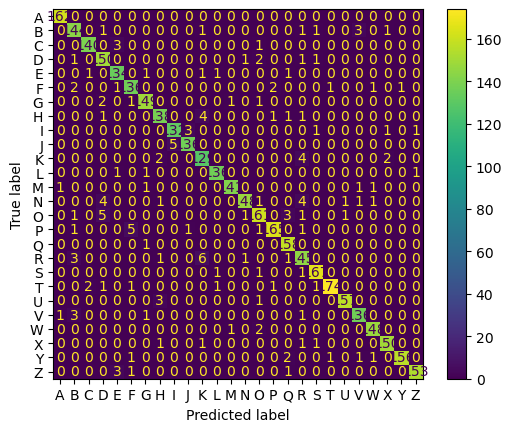

In [52]:
plot_confusion_matrix(modelf1, X_test, Y_test)  
plt.show()

In [ ]:
### DECISION TREE CLASSIFIER

In [35]:
model2 = tree.DecisionTreeClassifier()

In [38]:
m = np.arange(1,30,2)
train_accu = np.empty(len(m))
test_accu = np.empty(len(m))

In [39]:
for i,k in enumerate(m):
    mod = tree.DecisionTreeClassifier(max_depth=k)
    mod.fit(X_train,Y_train)
    train_accu[i]=mod.score(X_train,Y_train)
    test_accu[i]=mod.score(X_test,Y_test)

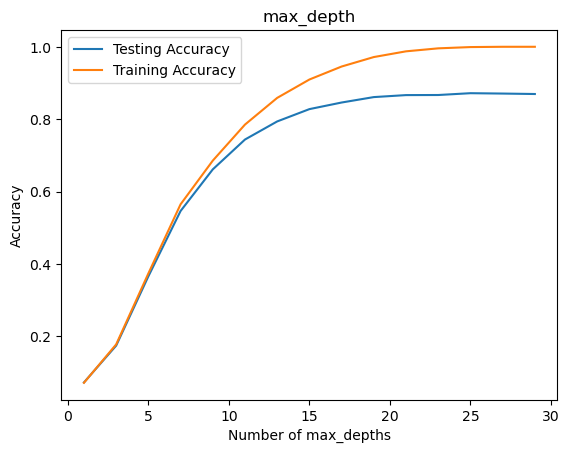

In [41]:
plt.title('max_depth')
plt.plot(m,test_accu, label = 'Testing Accuracy')
plt.plot(m,train_accu, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of max_depths')
plt.ylabel('Accuracy')
plt.show()

In [42]:
o = np.arange(100,1500,50)
train_accur = np.empty(len(o))
test_accur = np.empty(len(o))

In [43]:
for i,k in enumerate(o):
    mod = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    mod.fit(X_train,Y_train)
    train_accur[i]=mod.score(X_train,Y_train)
    test_accur[i]=mod.score(X_test,Y_test)

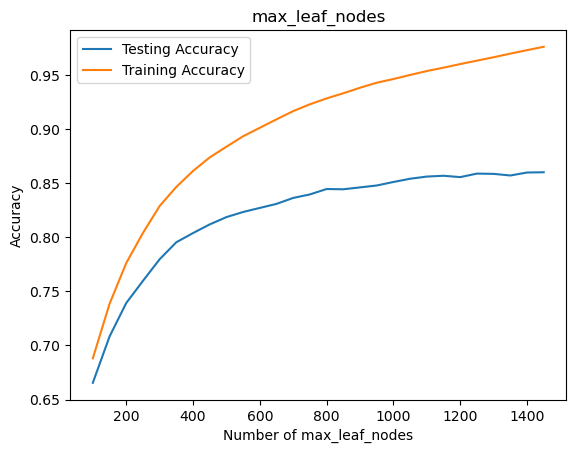

In [44]:
plt.title('max_leaf_nodes')
plt.plot(o,test_accur, label = 'Testing Accuracy')
plt.plot(o,train_accur, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of max_leaf_nodes')
plt.ylabel('Accuracy')
plt.show()

In [46]:
modelf2 =  tree.DecisionTreeClassifier(criterion= 'gini',
                                          max_depth = 20 ,
                                          max_leaf_nodes= 500, 
                                          min_samples_leaf= 1, 
                                          min_samples_split = 2)

In [47]:
modelf2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=500)

In [48]:
modelf2.score(X_test,Y_test)

0.8195

In [53]:
y_pred2 = modelf2.predict(X_test)

In [54]:
cm2 = confusion_matrix(Y_test,y_pred2)
print(cm2)

[[149   0   1   0   0   0   0   1   2   0   1   0   3   0   0   0   2   1
    0   0   0   0   2   0   0   0]
 [  0 108   0   4   1   1   1   5   0   6   2   0   0   0   1   0   0   9
    6   1   0   2   0   5   0   0]
 [  0   0 126   0   5   2   3   0   0   1   2   2   0   0   1   0   1   0
    1   0   0   0   0   0   0   0]
 [  0   7   0 137   2   1   0   2   0   1   0   1   0   1   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 119   2   3   0   2   0   0   1   0   0   0   1   0   0
    3   0   1   0   0   3   0   1]
 [  0   1   0   0   1 115   1   1   0   1   0   1   1   0   0   8   0   1
    4   1   0   1   0   0   7   0]
 [  0   2   4   0   1   1 129   2   0   0   3   3   0   1   2   0   4   1
    1   0   0   0   0   0   0   0]
 [  1   7   0   4   0   1   5 102   0   0   7   1   0   0   1   0   1  11
    0   0   3   0   0   0   2   0]
 [  0   0   1   2   0   4   0   0 125   1   0   0   0   0   0   1   1   0
    0   0   0   0   0   1   0   2]
 [  0   1   0   1  

In [55]:
clf2 = classification_report(Y_test, y_pred2)
print(clf2)

              precision    recall  f1-score   support

           A       0.93      0.92      0.93       162
           B       0.67      0.71      0.69       152
           C       0.86      0.88      0.87       144
           D       0.77      0.88      0.82       156
           E       0.75      0.86      0.80       139
           F       0.70      0.80      0.74       144
           G       0.77      0.84      0.80       154
           H       0.68      0.70      0.69       146
           I       0.83      0.91      0.87       138
           J       0.84      0.81      0.83       141
           K       0.72      0.78      0.75       137
           L       0.83      0.87      0.85       139
           M       0.90      0.89      0.89       145
           N       0.79      0.78      0.79       161
           O       0.87      0.67      0.76       173
           P       0.85      0.79      0.82       174
           Q       0.86      0.84      0.85       159
           R       0.64    

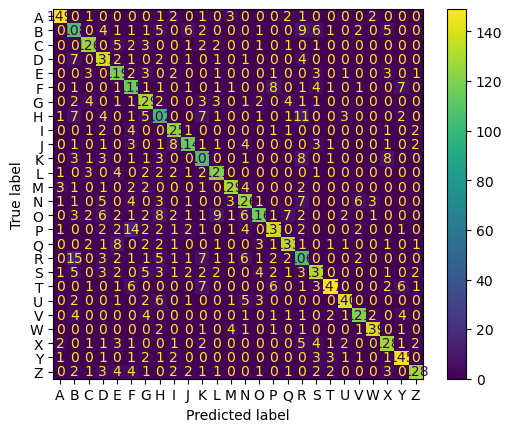

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelf2, X_test, Y_test)  
plt.show()

In [57]:
### KNN 

In [60]:
p = np.arange(1,10)
train_accura = np.empty(len(p))
test_accura = np.empty(len(p))

In [61]:
for i,k in enumerate(p):
    mod = KNeighborsClassifier(n_neighbors=k)
    mod.fit(X_train,Y_train)
    train_accura[i]=mod.score(X_train,Y_train)
    test_accura[i]=mod.score(X_test,Y_test)

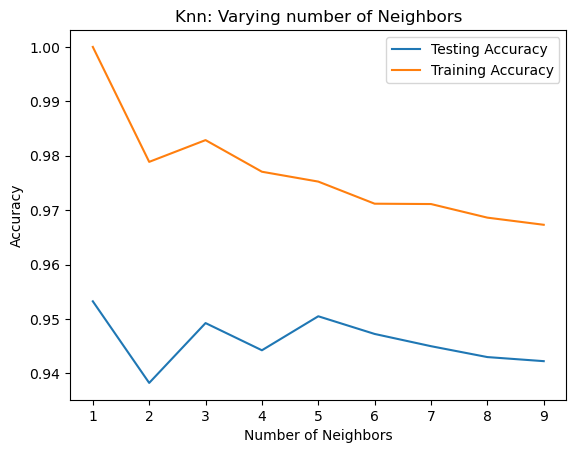

In [62]:
plt.title('Knn: Varying number of Neighbors')
plt.plot(p,test_accura, label = 'Testing Accuracy')
plt.plot(p,train_accura, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
modelf3 = KNeighborsClassifier(n_neighbors=5,leaf_size= 1,
                               metric='manhattan',
                               weights= 'distance' )

In [79]:
modelf3.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')

In [80]:
modelf3.score(X_test,Y_test)

0.9575

In [81]:
y_pred3 = modelf3.predict(X_test)

In [68]:
cm3 = confusion_matrix(Y_test,y_pred3)
print(cm3)

[[162   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 148   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   1   0   0]
 [  0   0 141   0   1   0   1   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 154   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 134   0   2   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   1   0   1]
 [  0   0   0   0   0 134   0   0   0   0   0   0   0   0   0   4   0   1
    0   4   0   0   0   0   1   0]
 [  0   1   0   1   1   0 148   0   1   0   0   0   0   0   1   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   2   0   3   1   0   1 128   1   0   3   0   0   0   0   1   1   3
    0   0   2   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 133   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [69]:
clf3 = classification_report(Y_test, y_pred3)
print(clf3)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       162
           B       0.87      0.97      0.92       152
           C       0.99      0.98      0.98       144
           D       0.92      0.99      0.95       156
           E       0.91      0.96      0.93       139
           F       0.94      0.93      0.94       144
           G       0.95      0.96      0.95       154
           H       0.90      0.88      0.89       146
           I       0.94      0.96      0.95       138
           J       0.96      0.95      0.96       141
           K       0.92      0.91      0.92       137
           L       0.99      0.97      0.98       139
           M       0.99      0.98      0.98       145
           N       0.97      0.89      0.93       161
           O       0.96      0.94      0.95       173
           P       0.97      0.94      0.96       174
           Q       0.96      0.97      0.97       159
           R       0.90    

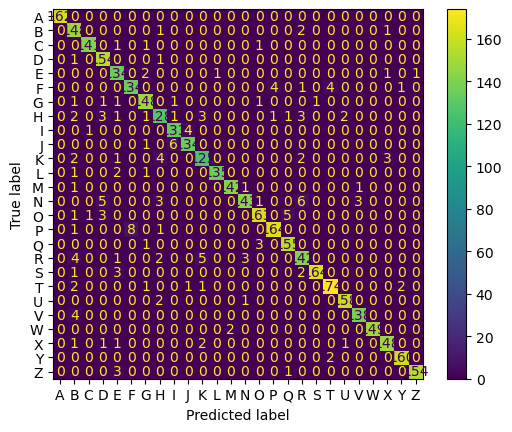

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelf3, X_test, Y_test)  
plt.show()

In [ ]:
### Logistic Regression

In [71]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [83]:
from sklearn.linear_model import LogisticRegression
modelf4 = LogisticRegression(C= 100, penalty = 'l2' , solver ='newton-cg')

In [84]:
modelf4.fit(X_train,Y_train)

LogisticRegression(C=100, solver='newton-cg')

In [85]:
modelf4.score(X_test,Y_test)

0.76625

In [86]:
y_pred4 = modelf4.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(Y_test,y_pred4)
print(cm4)

[[146   0   0   0   0   0   0   1   0   1   3   0   1   1   1   0   1   1
    2   0   0   2   1   1   0   0]
 [  1 110   1   4   1   1   4   3   6   1   0   0   0   0   2   2   2   6
    4   0   0   1   0   2   1   0]
 [  0   0 110   2   5   0   8   1   0   0  12   1   0   0   0   0   1   0
    1   3   0   0   0   0   0   0]
 [  0   5   0 135   0   0   1   2   0   0   0   0   0   0   3   1   0   1
    0   5   0   0   0   2   0   1]
 [  0   4   0   0 113   0   7   0   0   0   2   0   0   0   0   0   4   1
    4   4   0   0   0   0   0   0]
 [  1   2   1   2   3 105   4   0   1   1   1   0   0   1   0   6   0   0
    3   7   1   0   1   2   2   0]
 [  0   2  23   2   2   0  75   1   0   0   5   6   2   0   1   6  13   4
    8   0   1   3   0   0   0   0]
 [  2   3   1   9   0   6   2  65   0   3  10   1   1   5  10   2   2  11
    0   0   5   4   0   2   2   0]
 [  1   0   0   1   0   1   0   0 117   4   1   1   0   0   1   2   0   0
    0   0   0   0   0   6   0   3]
 [  3   0   0   1  

In [87]:
clf4 = classification_report(Y_test, y_pred4)
print(clf4)

              precision    recall  f1-score   support

           A       0.86      0.90      0.88       162
           B       0.67      0.72      0.70       152
           C       0.72      0.76      0.74       144
           D       0.76      0.87      0.81       156
           E       0.72      0.81      0.76       139
           F       0.74      0.73      0.74       144
           G       0.56      0.49      0.52       154
           H       0.48      0.45      0.46       146
           I       0.84      0.85      0.84       138
           J       0.85      0.82      0.83       141
           K       0.62      0.69      0.66       137
           L       0.82      0.81      0.81       139
           M       0.88      0.90      0.89       145
           N       0.91      0.85      0.88       161
           O       0.75      0.66      0.70       173
           P       0.85      0.79      0.82       174
           Q       0.74      0.77      0.75       159
           R       0.68    

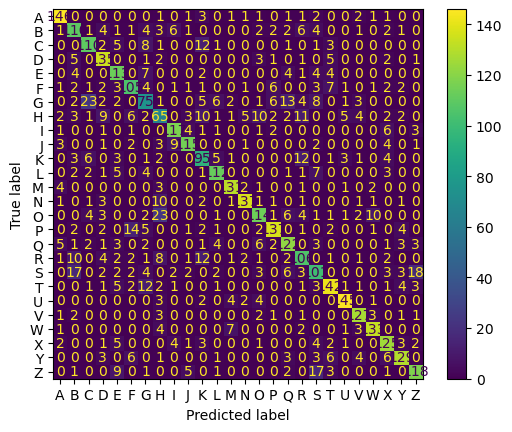

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelf4, X_test, Y_test)  
plt.show()

In [89]:
from sklearn.dummy import DummyClassifier
classifier=DummyClassifier(strategy='uniform')

In [91]:
classifier.fit(X_train , Y_train)
prediction=classifier.predict(Y_test)
classifier.score(X_train,Y_train)

0.035

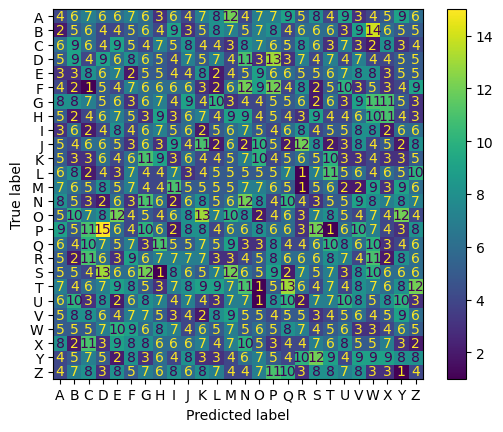

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test)  
plt.show()

In [93]:
clf5 = classification_report(Y_test, prediction)
print(clf5)

              precision    recall  f1-score   support

           A       0.05      0.05      0.05       162
           B       0.06      0.06      0.06       152
           C       0.02      0.02      0.02       144
           D       0.04      0.04      0.04       156
           E       0.03      0.04      0.03       139
           F       0.06      0.07      0.06       144
           G       0.04      0.03      0.04       154
           H       0.04      0.04      0.04       146
           I       0.04      0.05      0.05       138
           J       0.03      0.03      0.03       141
           K       0.03      0.03      0.03       137
           L       0.03      0.03      0.03       139
           M       0.06      0.07      0.07       145
           N       0.02      0.02      0.02       161
           O       0.06      0.05      0.06       173
           P       0.04      0.03      0.04       174
           Q       0.02      0.02      0.02       159
           R       0.04    

Text(70.72222222222221, 0.5, 'Truth')

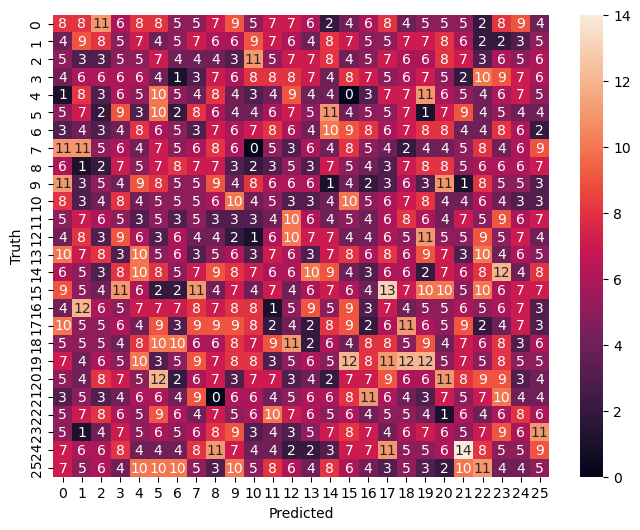

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(Y_test,prediction)
%matplotlib inline
plt.figure(figsize=(8,6))
sns.heatmap(cm5,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')